In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


João Ferreira corre a seguinte célula

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/PMBD - Grupo 15/data/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/PMBD - Grupo 15/data


Os restantes Joões correm a próxima

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/191wfgS2CMMr4imXFSZu17sxO5T2mF5kq/data


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

# build our own SparkSession
spark = SparkSession\
    .builder\
    .appName("BigData")\
    .config("spark.sql.shuffle.partitions",6)\
    .config("spark.sql.repl.eagereval.enabled",True)\
    .config("spark.driver.memory", '8g')\
    .config("spark.driver.maxResultSize", "2g") \
    .getOrCreate()

In [ ]:
!ls

 data_dictionary_trip_records_hvfhs.pdf   pre_process_df.parquet
 dataout				  taxi_zone_lookup.csv
'nyc 2021-01-01 to 2021-12-31.csv'	  taxi_zones
 parquet				  working_parquet_format.pdf


# EDA - Exploratory Data Analysis

In [ ]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_license = spark.read.parquet('dataout/df_license/').toPandas()

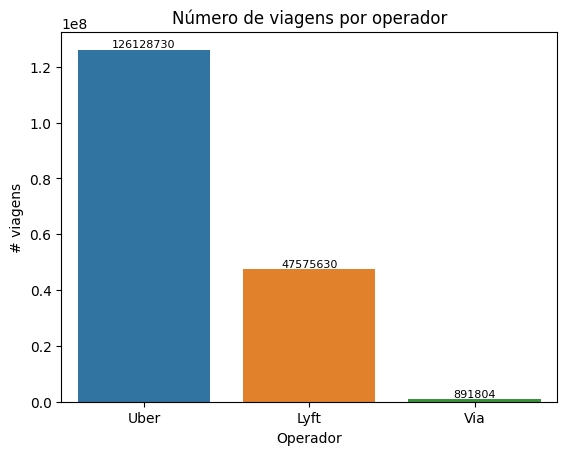

In [ ]:
chart = sns.barplot(data=df_license, x="hvfhs_license_num", y="count", hue=None)

for p in chart.patches:
    chart.text(p.get_x() + p.get_width() / 2., p.get_height(), f"{p.get_height():.0f}", 
            fontsize=8, color='black', ha='center', va='bottom')
    
chart.set_title('Número de viagens por operador')
chart.set_xlabel('Operador')
chart.set_ylabel('# viagens')
plt.show()

In [ ]:
df_dispatching = spark.read.parquet('dataout/dispatching/').toPandas()

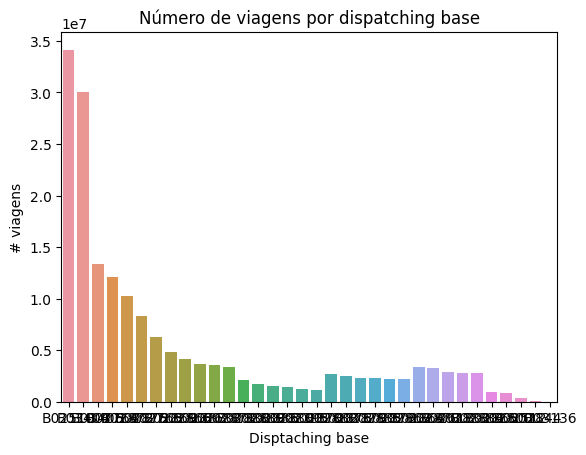

In [ ]:
chart = sns.barplot(data=df_dispatching, x="dispatching_base_num", y="count", hue=None)
chart.set_title('Número de viagens por dispatching base')
chart.set_xlabel('Disptaching base')
chart.set_ylabel('# viagens')
plt.show()

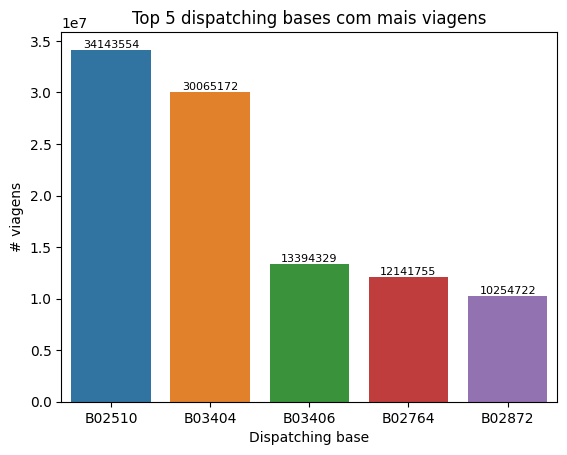

In [ ]:
chart = sns.barplot(data=df_dispatching.head(), x="dispatching_base_num", y="count", hue=None)

for p in chart.patches:
    chart.text(p.get_x() + p.get_width() / 2., p.get_height(), f"{p.get_height():.0f}", 
            fontsize=8, color='black', ha='center', va='bottom')
    
chart.set_title('Top 5 dispatching bases com mais viagens')
chart.set_xlabel('Dispatching base')
chart.set_ylabel('# viagens')
plt.show()

In [ ]:
df_shared_request = spark.read.parquet('dataout/shared_request/').toPandas()

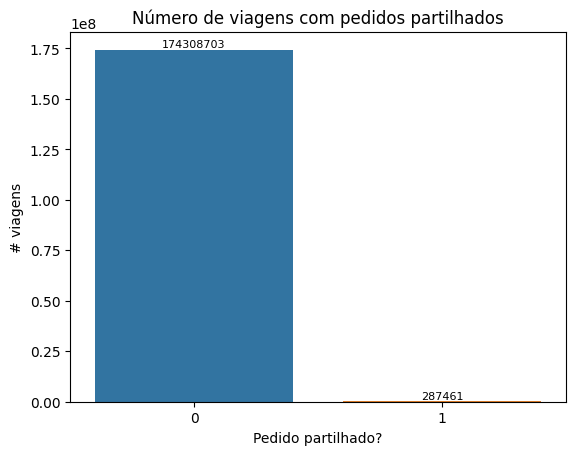

In [ ]:
chart = sns.barplot(data=df_shared_request, x="shared_request_flag_binary", y="count", hue=None)

for p in chart.patches:
    chart.text(p.get_x() + p.get_width() / 2., p.get_height(), f"{p.get_height():.0f}", 
            fontsize=8, color='black', ha='center', va='bottom')

chart.set_title('Número de viagens com pedidos partilhados')
chart.set_xlabel('Pedido partilhado')
chart.set_ylabel('# viagens')
plt.show()

In [ ]:
df_shared_match = spark.read.parquet('dataout/shared_match/').toPandas()

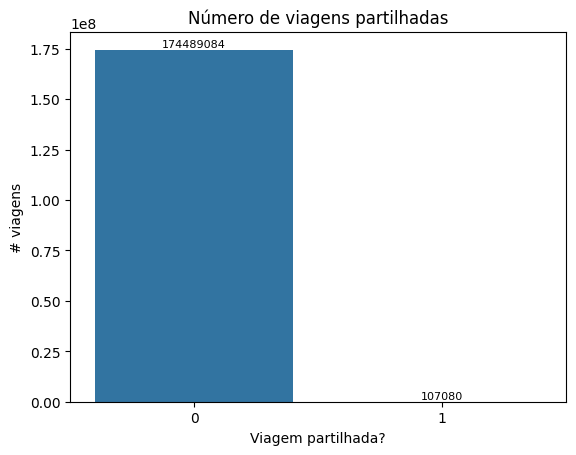

In [ ]:
chart = sns.barplot(data=df_shared_match, x="shared_match_flag_binary", y="count", hue=None)

for p in chart.patches:
    chart.text(p.get_x() + p.get_width() / 2., p.get_height(), f"{p.get_height():.0f}", 
            fontsize=8, color='black', ha='center', va='bottom')

chart.set_title('Número de viagens partilhadas')
chart.set_xlabel('Viagem partilhada?')
chart.set_ylabel('# viagens')
plt.show()

In [ ]:
df_wav_match = spark.read.parquet('dataout/wav_match/').toPandas()

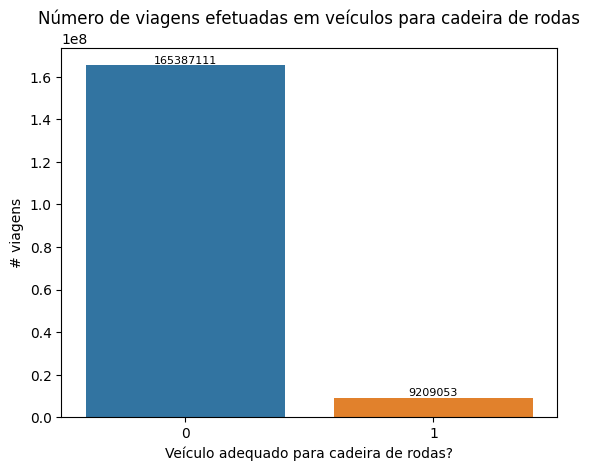

In [ ]:
chart = sns.barplot(data=df_wav_match, x="wav_match_flag_binary", y="count", hue=None)

for p in chart.patches:
    chart.text(p.get_x() + p.get_width() / 2., p.get_height(), f"{p.get_height():.0f}", 
            fontsize=8, color='black', ha='center', va='bottom')

chart.set_title('Número de viagens efetuadas em veículos para cadeira de rodas')
chart.set_xlabel('Veículo adequado para cadeira de rodas?')
chart.set_ylabel('# viagens')
plt.show()

In [ ]:
df_trip_km = spark.read.parquet('dataout/trip_km/').limit(10000000).toPandas()

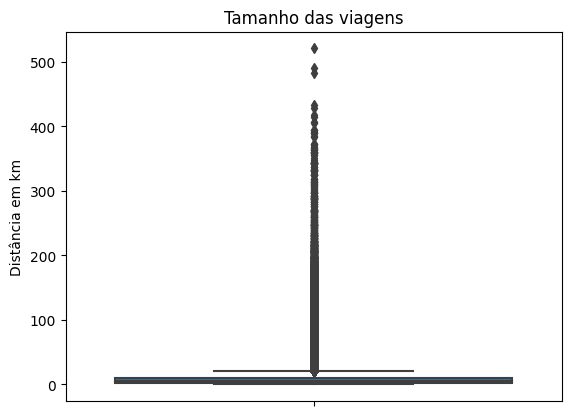

In [ ]:
chart = sns.boxplot(data=df_trip_km, y="trip_km", hue=None)
chart.set_title('Tamanho das viagens')
chart.set_ylabel('Distância em km')
plt.show()

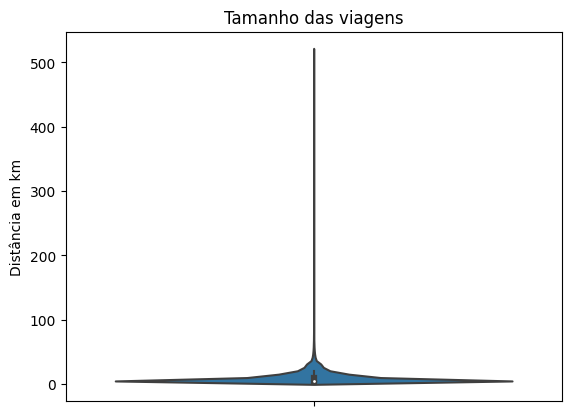

In [ ]:
chart = sns.violinplot(data=df_trip_km, y="trip_km", hue=None)
chart.set_title('Tamanho das viagens')
chart.set_ylabel('Distância em km')
plt.show()

In [ ]:
df_client_total_paid = spark.read.parquet('dataout/total_paid/').limit(10000000).toPandas()

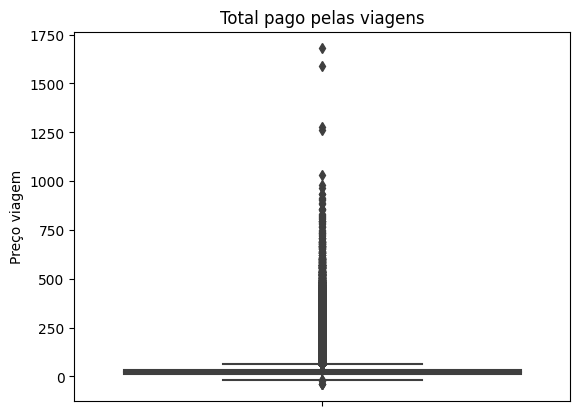

In [ ]:
chart = sns.boxplot(data=df_client_total_paid, y="client_total_paid", hue=None)
chart.set_title('Total pago pelas viagens')
chart.set_ylabel('Preço viagem')
plt.show()

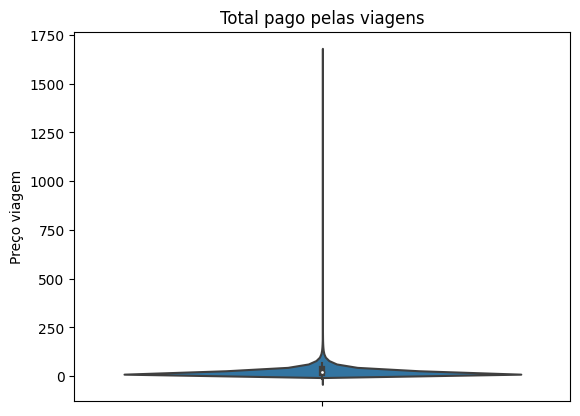

In [ ]:
chart = sns.violinplot(data=df_client_total_paid, y="client_total_paid", hue=None)
chart.set_title('Total pago pelas viagens')
chart.set_ylabel('Preço viagem')
plt.show()

In [ ]:
df_trips_month = spark.read.parquet('dataout/monthly_trips/').toPandas()

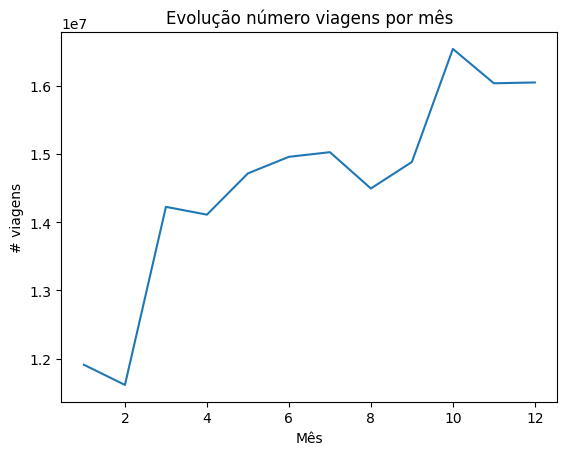

In [ ]:
chart = sns.lineplot(data=df_trips_month, x="month_col", y="count")
chart.set_title('Evolução número viagens por mês')
chart.set_xlabel('Mês')
chart.set_ylabel('# viagens')
plt.show()

In [ ]:
df_daily_trips = spark.read.parquet('dataout/daily_trips/').toPandas()

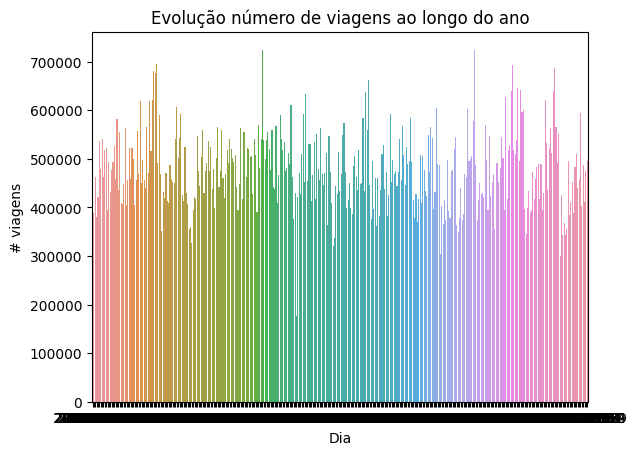

In [ ]:
chart = sns.barplot(data=df_daily_trips, x="datetime", y="count")
chart.set_title('Evolução número de viagens ao longo do ano')
chart.set_xlabel('Dia')
chart.set_ylabel('# viagens')
plt.show()

In [ ]:
df_daily_trips.sort_values('count', ascending=False).head(10)

,datetime,count
125,2021-10-30,724627
281,2021-12-11,724255
47,2021-12-04,694208
309,2021-11-13,693900
340,2021-11-20,686059
45,2021-10-16,680074
46,2021-10-29,676702
203,2021-12-10,662735
313,2021-10-23,646105
315,2021-12-03,641418


In [ ]:
df_hourly_trips = spark.read.parquet('dataout/hourly_trips/').toPandas()

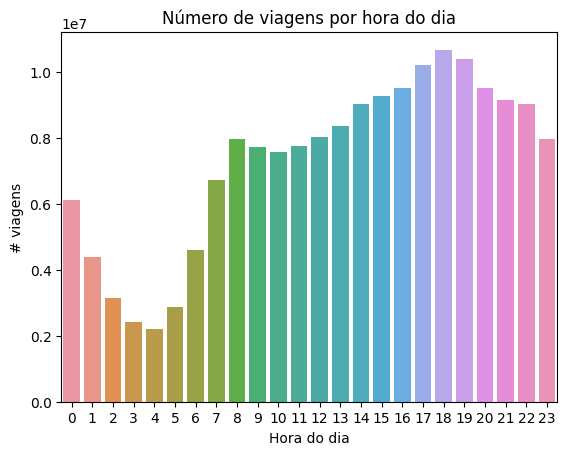

In [ ]:
chart = sns.barplot(data=df_hourly_trips, x="hour", y="count")
chart.set_title('Número de viagens por hora do dia')
chart.set_xlabel('Hora do dia')
chart.set_ylabel('# viagens')
plt.show()

In [ ]:
df_PUBorough = spark.read.parquet('dataout/PUBorough/').toPandas()

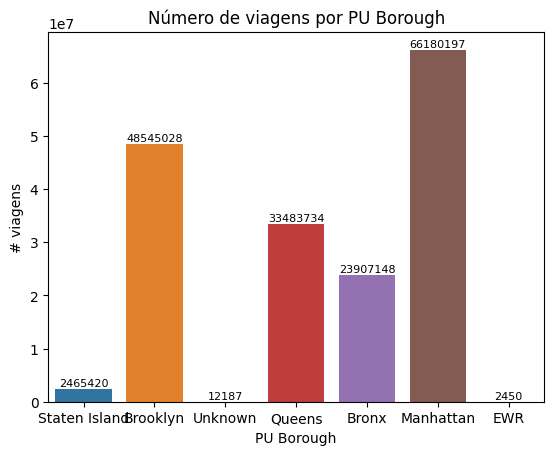

In [ ]:
chart = sns.barplot(data=df_PUBorough, x="PUBorough", y="count")

for p in chart.patches:
    chart.text(p.get_x() + p.get_width() / 2., p.get_height(), f"{p.get_height():.0f}", 
            fontsize=8, color='black', ha='center', va='bottom')
    
chart.set_title('Número de viagens por PU Borough')
chart.set_xlabel('PU Borough')
chart.set_ylabel('# viagens')
plt.show()

In [ ]:
df_DOBorough = spark.read.parquet('dataout/DOBorough/').toPandas()

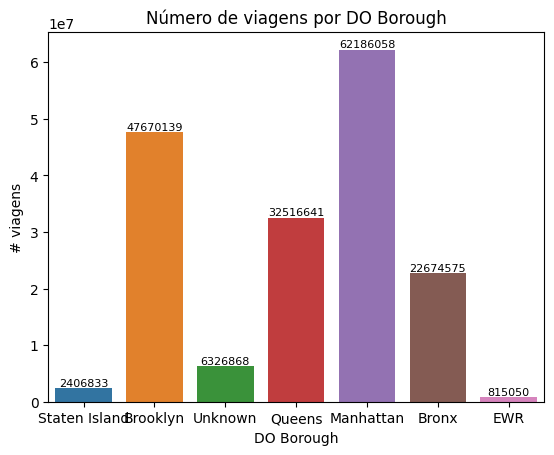

In [ ]:
chart = sns.barplot(data=df_DOBorough, x="DOBorough", y="count")

for p in chart.patches:
    chart.text(p.get_x() + p.get_width() / 2., p.get_height(), f"{p.get_height():.0f}", 
            fontsize=8, color='black', ha='center', va='bottom')
    
chart.set_title('Número de viagens por DO Borough')
chart.set_xlabel('DO Borough')
chart.set_ylabel('# viagens')
plt.show()

In [ ]:
df_origem_destino = spark.read.parquet('dataout/origem_destino/').limit(10000000).toPandas()

In [ ]:
cont_table = pd.crosstab(df_origem_destino['PUBorough'], df_origem_destino['DOBorough'])
cont_table

DOBorough,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island,Unknown
PUBorough,,,,,,,
Bronx,860852,16699,889,199029,42116,335,64361
Brooklyn,17720,1952744,7299,344043,257964,10597,28348
EWR,1,10,0,53,1,0,0
Manhattan,204498,365706,47053,3031373,338586,5243,180958
Queens,40228,234053,1757,287647,1213543,1504,108653
Staten Island,324,9854,1800,3749,1460,115050,3380
Unknown,108,16,2,31,198,1,164


Text(0, 0.5, '# viagens')

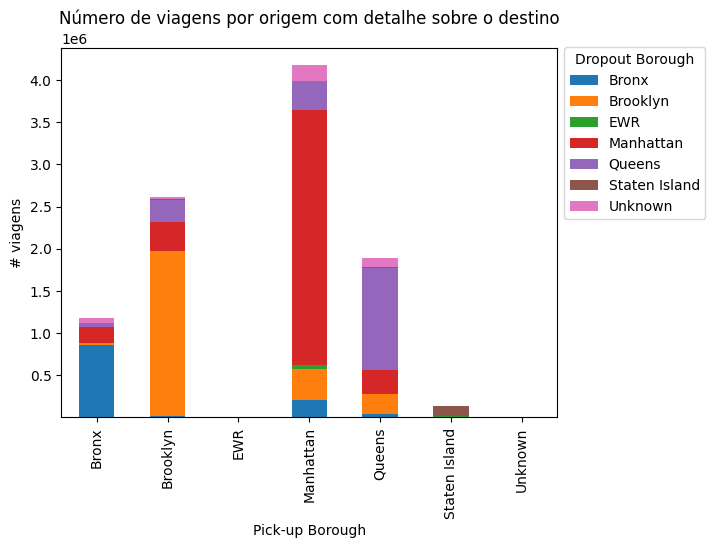

In [ ]:
chart = cont_table.plot(kind='bar', stacked=True)
chart.legend(title='Dropout Borough', bbox_to_anchor=(1, 1.02), loc='upper left')
chart.set_title('Número de viagens por origem com detalhe sobre o destino')
chart.set_xlabel('Pick-up Borough')
chart.set_ylabel('# viagens')